In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier as ADAB
from xgboost import XGBClassifier as xgb
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
import graphviz 

In [21]:
df = pd.read_csv('breast-cancer-wisconsin.csv',header=None)
X = df.iloc[:,1:10].values
y = df.iloc[:,-1].values/2-1
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=400,shuffle=False)

In [22]:
# part a
lrc = LR().fit(X_train, y_train)
miss_lr = 1-lrc.score(X_test, y_test)
print('Misclassification rate for logistic regression:',miss_lr)
y_lr = lrc.predict(X_test)
y_prob = lrc.predict_proba(X_test)
prob_true = y_prob[y_lr==y_test]
rms_lr = np.sqrt(np.mean((np.amax(prob_true,axis=1)-0.5)**2))
print('Root-mean-squared margin for logistic regression:',rms_lr)

Misclassification rate for logistic regression: 0.010600706713780883
Root-mean-squared margin for logistic regression: 0.4783418582500245


Misclassification rate for KNN with number of neighbors 1,...,10=
 [0.01766784 0.02473498 0.01413428 0.01766784 0.01766784 0.01060071
 0.01413428 0.01060071 0.01060071 0.01060071]


Text(0.5,1,'KNN misclassification rate')

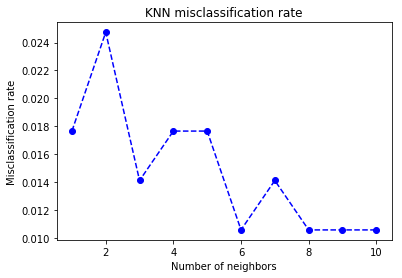

In [23]:
# part b
miss_knn = np.zeros(10)
y_knn = np.zeros((10,283))
for i in range(1,11):
    knnc = KNN(n_neighbors=i).fit(X_train,y_train)
    miss_knn[i-1] = 1-knnc.score(X_test,y_test)
    y_knn[i-1] = knnc.predict(X_test)

print('Misclassification rate for KNN with number of neighbors 1,...,10=\n',miss_knn)
plt.plot(np.arange(1,11),miss_knn,'bo--')
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification rate')
plt.title('KNN misclassification rate')

In [24]:
# part c
ldac = LDA().fit(X_train,y_train)
miss_lda = 1-ldac.score(X_test,y_test)
y_lda = ldac.predict(X_test)
print('Misclassification rate for linear discriminant analysis:',miss_lda)

Misclassification rate for linear discriminant analysis: 0.017667844522968212


In [25]:
# part d
svm_lin = SVC(kernel='linear',probability=True).fit(X_train,y_train)
miss_svm_lin = 1-svm_lin.score(X_test,y_test)
print('Misclassification rate for SVM with linear kernel:',miss_svm_lin)
y_svm_lin = svm_lin.predict(X_test)
y_prob = svm_lin.predict_proba(X_test)
prob_true = y_prob[y_svm_lin==y_test]
rms_svm_lin = np.sqrt(np.mean((np.amax(prob_true,axis=1)-0.5)**2))
print('Root-mean-squared margin for SVM with linear kernel:',rms_svm_lin)

y_svm_poly = np.zeros((4,283))
for i in range(2,6):
    svm_poly = SVC(kernel='poly',degree=i,probability=True,coef0=0).fit(X_train,y_train)
    miss_svm_poly = 1-svm_poly.score(X_test,y_test)
    print('Misclassification rate for SVM with polynomial kernel degree',i,':',miss_svm_poly)
    y_svm_poly[i-2] = svm_poly.predict(X_test)
    y_prob = svm_poly.predict_proba(X_test)
    prob_true = y_prob[y_svm_poly[i-2]==y_test]
    rms_svm_poly = np.sqrt(np.mean((np.amax(prob_true,axis=1)-0.5)**2))
    print('Root-mean-squared margin for SVM with polynomial kernel degree',i,':',rms_svm_poly)
    
svm_rbf = SVC(kernel='rbf',probability=True).fit(X_train,y_train)
miss_svm_rbf = 1-svm_rbf.score(X_test,y_test)
print('Misclassification rate for SVM with rbf kernel:',miss_svm_rbf)
y_svm_rbf = svm_rbf.predict(X_test)
y_prob = svm_rbf.predict_proba(X_test)
prob_true = y_prob[y_svm_rbf==y_test]
rms_svm_rbf = np.sqrt(np.mean((np.amax(prob_true,axis=1)-0.5)**2))
print('Root-mean-squared margin for SVM with rbf kernel:',rms_svm_rbf)

svm_sigmoid = SVC(kernel='sigmoid',probability=True,coef0=3).fit(X_train,y_train)
miss_svm_sigmoid = 1-svm_sigmoid.score(X_test,y_test)
print('Misclassification rate for SVM with sigmoid kernel:',miss_svm_sigmoid)
y_svm_sigmoid = svm_sigmoid.predict(X_test)
y_prob = svm_sigmoid.predict_proba(X_test)
prob_true = y_prob[y_svm_sigmoid==y_test]
rms_svm_sigmoid = np.sqrt(np.mean((np.amax(prob_true,axis=1)-0.5)**2))
print('Root-mean-squared margin for SVM with sigmoid kernel:',rms_svm_sigmoid)

Misclassification rate for SVM with linear kernel: 0.014134275618374548
Root-mean-squared margin for SVM with linear kernel: 0.4718996876606557
Misclassification rate for SVM with polynomial kernel degree 2 : 0.010600706713780883
Root-mean-squared margin for SVM with polynomial kernel degree 2 : 0.46318543330738515
Misclassification rate for SVM with polynomial kernel degree 3 : 0.010600706713780883
Root-mean-squared margin for SVM with polynomial kernel degree 3 : 0.4496265530883365
Misclassification rate for SVM with polynomial kernel degree 4 : 0.035335689045936425
Root-mean-squared margin for SVM with polynomial kernel degree 4 : 0.4253710308092194
Misclassification rate for SVM with polynomial kernel degree 5 : 0.035335689045936425
Root-mean-squared margin for SVM with polynomial kernel degree 5 : 0.36774545647873536
Misclassification rate for SVM with rbf kernel: 0.017667844522968212
Root-mean-squared margin for SVM with rbf kernel: 0.47181171585470805
Misclassification rate for 

Misclassification rate for decision tree with max depth 3,...,10=
 [0.03533569 0.02826855 0.04946996 0.03886926 0.05300353 0.04946996
 0.0459364  0.04946996]


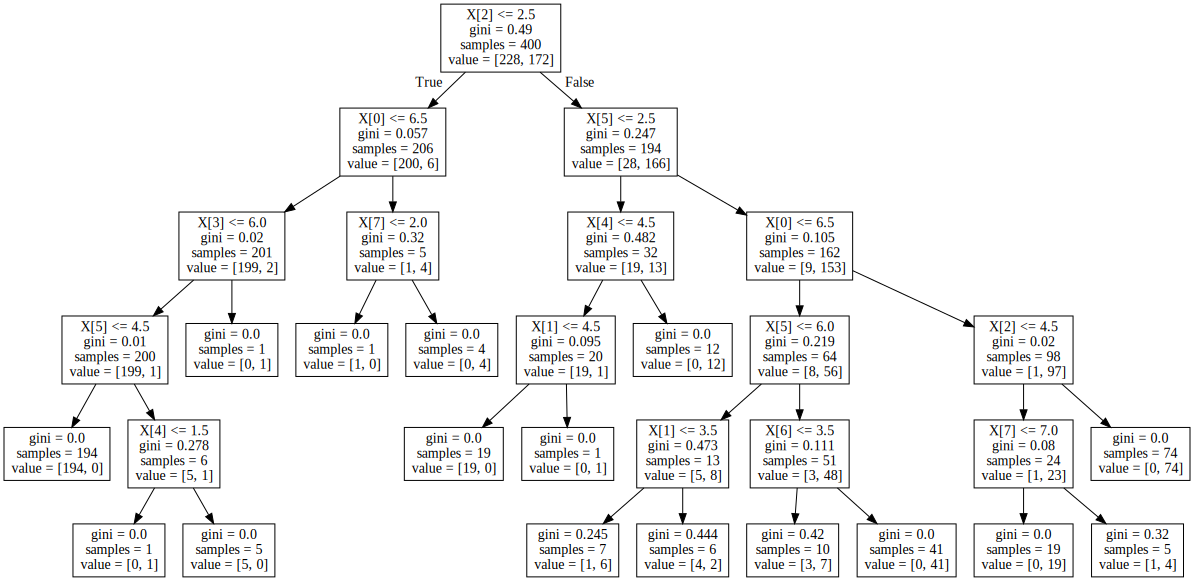

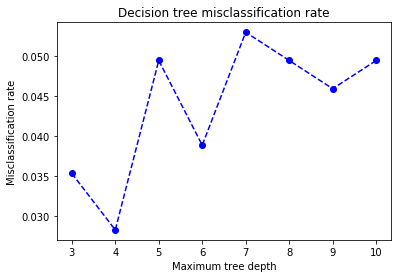

In [26]:
# part e
y_dtree = np.zeros((8,283))
miss_dtree = np.zeros(8)
for i in range(3,11):
    dtree = DTC(max_depth=i).fit(X_train,y_train)
    miss_dtree[i-3] = 1-dtree.score(X_test,y_test)
    y_dtree[i-3] = dtree.predict(X_test)

print('Misclassification rate for decision tree with max depth 3,...,10=\n',miss_dtree)    
plt.plot(np.arange(3,11),miss_dtree,'bo--')
plt.xlabel('Maximum tree depth')
plt.ylabel('Misclassification rate')
plt.title('Decision tree misclassification rate')

dtree = DTC(max_depth=5).fit(X_train,y_train)
graph_data = export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(graph_data) 
graph

In [27]:
# part f
y_adaboost = np.zeros((5,283))
miss_adaboost = np.zeros(5)
num_trees = np.arange(100,501,100)
for i in range(5):
    adaboost = ADAB(n_estimators=num_trees[i]).fit(X_train,y_train)
    miss_adaboost[i] = 1-adaboost.score(X_test,y_test)
    y_adaboost[i] = adaboost.predict(X_test)
print('Misclassification rate for AdaBoost with number of learners 100,200,...,500=\n',miss_adaboost) 

y_xgboost = np.zeros((5,283))
miss_xgboost = np.zeros(5)
for i in range(5):
    xgboost = xgb(n_estimators=num_trees[i]).fit(X_train,y_train)
    miss_xgboost[i] = 1-xgboost.score(X_test,y_test)
    y_xgboost[i] = xgboost.predict(X_test)    
print('Misclassification rate for XGBoost with number of learners 100,200,...,500=\n',miss_xgboost) 

y_rf = np.zeros((5,283))
miss_rf = np.zeros(5)
for i in range(5):
    rf = RFC(n_estimators=num_trees[i]).fit(X_train,y_train)
    miss_rf[i] = 1-rf.score(X_test,y_test)
    y_rf[i] = rf.predict(X_test)    
print('Misclassification rate for random forest with number of learners 100,200,...,500=\n',miss_rf) 

Misclassification rate for AdaBoost with number of learners 100,200,...,500=
 [0.03886926 0.03886926 0.04946996 0.03886926 0.04240283]
Misclassification rate for XGBoost with number of learners 100,200,...,500=
 [0.02120141 0.02120141 0.02120141 0.02120141 0.02120141]
Misclassification rate for random forest with number of learners 100,200,...,500=
 [0.01413428 0.01766784 0.01413428 0.01413428 0.01413428]


In [28]:
# part g
def weighted_cost(y_hat):
    cost = 0
    for i in range(0,282):
        if y_test[i]==0 and y_hat[i]==1:
            cost = cost+1
        elif y_test[i]==1 and y_hat[i]==0:
            cost = cost+100
    return cost/6916

#####################################################

C_lr = weighted_cost(y_lr)
print('Weighted cost for logistic regression:',C_lr)

C_knn = np.zeros(10)
for i in range(1,11):
    C_knn[i-1] = weighted_cost(y_knn[i-1])
    print('Weighted cost for KNN with',i,'neighbor:',C_knn[i-1])

C_lda = weighted_cost(y_lda)
print('Weighted cost for linear discriminant analysis:',C_lda)

C_svm_lin = weighted_cost(y_svm_lin)
print('Weighted cost for SVM with linear kernel:',C_svm_lin)

C_svm_poly = np.zeros(4)
for i in range(2,6):
    C_svm_poly[i-2] = weighted_cost(y_svm_poly[i-2])
    print('Weighted cost for SVM with polynomial kernel degree',i,':',C_svm_poly[i-2])
    
C_svm_rbf = weighted_cost(y_svm_rbf)
print('Weighted cost for SVM with rbf kernel:',C_svm_rbf)

C_svm_sigmoid = weighted_cost(y_svm_sigmoid)
print('Weighted cost for SVM with sigmoid kernel:',C_svm_sigmoid)

C_dtree = np.zeros(8)
for i in range(3,11):
    C_dtree[i-3] = weighted_cost(y_dtree[i-3])
    print('Weighted cost for decision tree with maximum depth',i,':',C_dtree[i-3])

C_adab = np.zeros(5)
for i in range(5):
    C_adab[i] = weighted_cost(y_adaboost[i])
    print('Weighted cost for AdaBoost with',num_trees[i],'learners:',C_adab[i])

C_xg = np.zeros(5)
for i in range(5):
    C_xg[i] = weighted_cost(y_xgboost[i])
    print('Weighted cost for XGBoost with',num_trees[i],'learners:',C_xg[i])
    
C_rf = np.zeros(5)
for i in range(5):
    C_rf[i] = weighted_cost(y_rf[i])
    print('Weighted cost for random forest with',num_trees[i],'learners:',C_rf[i])

Weighted cost for logistic regression: 0.014748409485251591
Weighted cost for KNN with 1 neighbor: 0.015037593984962405
Weighted cost for KNN with 2 neighbor: 0.07258530942741469
Weighted cost for KNN with 3 neighbor: 0.000578368999421631
Weighted cost for KNN with 4 neighbor: 0.029352226720647773
Weighted cost for KNN with 5 neighbor: 0.015037593984962405
Weighted cost for KNN with 6 neighbor: 0.014748409485251591
Weighted cost for KNN with 7 neighbor: 0.014893001735106999
Weighted cost for KNN with 8 neighbor: 0.014748409485251591
Weighted cost for KNN with 9 neighbor: 0.014748409485251591
Weighted cost for KNN with 10 neighbor: 0.014748409485251591
Weighted cost for linear discriminant analysis: 0.05798149219201851
Weighted cost for SVM with linear kernel: 0.014893001735106999
Weighted cost for SVM with polynomial kernel degree 2 : 0.014748409485251591
Weighted cost for SVM with polynomial kernel degree 3 : 0.029063042220936957
Weighted cost for SVM with polynomial kernel degree 4 :

The best classifiers in terms of misclassification rate are logistic regression, KNN with 6, 8, 9, 10 neighbors, SVM with polynomial kernel degree 2 and 3. They all have 3 errors among 283 test instances (rate=0.01060071).

The RMS margin around the decision probability 0.5 is largest in logistic regression and SVM with sigmoid kernel (when its intercept parameter coef0 is optimized). Note that for some other algorithms, better results may be possible through parameter optimization. While some algorithms are simpler with less parameters, some others need parameter optimization for high performance. 

In terms of the weighted cost, the best classifier is KNN with 3 neighbors as it achieves a cost of only 4/6916 with its 4 errors. This means that all of its 4 errors are the decisions "sick" when the instances are actually "healthy". Note that among the two types of error in this application, this error type (decide "sick" while the ground truth is "healthy") is the less risky one compared to the other error (decide "healthy" for "sick" patient). This is due to the nature of this problem. When the patient does not actually have cancer and you decide "sick", the cost is due to some extra screening, which would cause some uncomfort and distress for the patient. However, when the patient actually has cancer and you miss it by deciding "healthy", the cost would be much higher as the treatment for the patient would be delayed in the best scenario. Hence, such an imbalanced cost function makes sense in this application. In fact, some algorithms can adapt to such special cost functions by using it in their training.